In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
df=pd.read_csv('vehicles.csv')

In [2]:
#impute missing data 
df['year'].fillna(df['year'].median(), inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['model'].fillna(df['model'].mode()[0],  inplace=True)
df['type'].fillna(df['type'].mode()[0],  inplace=True)
df['manufacturer'].fillna(df['manufacturer'].mode()[0],  inplace=True)
df = df.sort_values(by='model')

# label_encoder object
label_encoder =LabelEncoder()

# Encode labels in column. 
df['Model']= label_encoder.fit_transform(df['model'])
df['Type']= label_encoder.fit_transform(df['type'])
df['Manufacturer']= label_encoder.fit_transform(df['manufacturer'])
df['Region']= label_encoder.fit_transform(df['region'])
df['Size']= label_encoder.fit_transform(df['size'])

# Drop outliers of price
df=df[(df.price<250000)]

In [ ]:
# Drop the price values equal to 0
for r in df.index:
  if df.loc[r, "price"] == 0:
     df.drop(r, inplace = True)

In [3]:
from sklearn.model_selection import train_test_split
# Choose X and y 
X=df.filter(['year', 'Model', 'odometer' ])
y=df.filter(['price'])
# standardize X values
sc=StandardScaler()
X=sc.fit_transform(X)
#Split data into test set and train set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=9047)

In [37]:
# KNN model
from sklearn.neighbors import KNeighborsRegressor
error_list=[]
for i in range(1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    error_list.append(error)
    

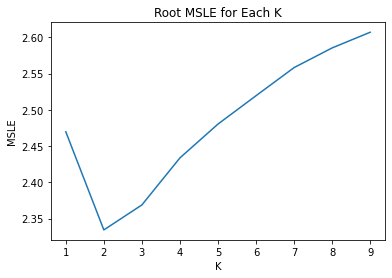

In [40]:
# Plot the error curve to choose the best K value
plt.xticks( rotation='horizontal')
plt.plot(list(range(1,10)),error_list)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Root MSLE for Each K')
plt.show()

In [41]:
knn=KNeighborsRegressor(n_neighbors=2) 
knn.fit(X_train,y_train)
print(" training data R2 Score: {}".format(knn.score(X_train, y_train))) 
print(" testing data R2 Score: {}".format(knn.score(X_test, y_test))) 

 training data R2 Score: 0.8936115173827675
 testing data R2 Score: 0.6326899351379331


In [ ]:
score=[]

In [7]:
# Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,random_state=60, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
rfr.fit(X_train,y_train.values.ravel())
print(" training data R2 Score: {}".format(rfr.score(X_train, y_train))) 
print(" testing data R2 Score: {}".format(rfr.score(X_test, y_test))) 

 training data R2 Score: 0.7813658864761359
 testing data R2 Score: 0.6868076335229607


In [8]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
bagg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=40),n_estimators= 200, random_state=1)                        
bagg.fit(X_train,y_train.values.ravel())
print(" training data R2 Score: {}".format(bagg.score(X_train, y_train))) 
print(" testing data R2 Score: {}".format(bagg.score(X_test, y_test)))

 training data R2 Score: 0.9554947350549761
 testing data R2 Score: 0.7494949338466863


In [9]:
# AdaBoost model
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=40),n_estimators=200,learning_rate=0.05)
ada.fit(X_train, y_train.values.ravel())
print(" training data R2 Score: {}".format(ada.score(X_train, y_train))) 
print(" testing data R2 Score: {}".format(ada.score(X_test, y_test)))

 training data R2 Score: 0.9837912017855271
 testing data R2 Score: 0.7215246748713857


In [10]:
# XGboost model
import xgboost as xgb
xg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.05,max_depth = 40, alpha = 5, n_estimators = 200)
xg.fit(X_train,y_train)
#y_pred_1=remove_neg(y_pred)
print(" training data R2 Score: {}".format(xg.score(X_train, y_train))) 
print(" testing data R2 Score: {}".format(xg.score(X_test, y_test)))

 training data R2 Score: 0.9860764996824636
 testing data R2 Score: 0.7355839846793026
